In [1]:
%matplotlib inline

import pandas as pd
import os
import re
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize

plt.style.use('ggplot')

In [2]:
def excel(df, filename):
    writer = pd.ExcelWriter( filename + '.xlsx')
    df.to_excel(writer)
    writer.save()

In [3]:
def FindNumbers(input_string):
    
    try:
        numbers_list = re.findall(r'\d+', input_string)
    except:
        numbers_list = []
        
    return numbers_list

In [4]:
def FindNumbersBrackets(input_string):
    
    try:
        numbers_list = re.findall(r'\[\d+-\d+\]', input_string)
    except:
        numbers_list = []
        
    return numbers_list

In [5]:
def ReplaceNumbers(input_string, mask_string = 'xxxx'):
    
    ## finding the list of numbers:
    numbers_list = FindNumbers(input_string)
    
    for item in numbers_list:
        input_string = input_string.replace(item, mask_string)
        
    return input_string

In [6]:
def PrintRows(df, line):
    
    
    try:
        df_temp = df[df['line'] == line].T.reset_index()
        df_temp.columns = ['column_name', 'value']



        for k in range(0, len(df_temp)):
            print('{} (column name)'.format(df_temp['column_name'][k]))
            try:
                value = df_temp['value'][k].replace('\n', '').strip()
            except:
                value = df_temp['value'][k]
            print(value)
            print('-------------')
            print(' ')
            print(' ')  
    except:
        print('Line not present. Please choose another one')
        print(' ')
        
        
    return 
    
    
    

In [7]:
cwd = os.getcwd()
print(cwd)

/home/leandro/Desktop/github_reps/sigo


In [8]:
path_data = os.path.join(cwd, '_data_output')


In [9]:
os.listdir(path_data)

['MainTrix_BoletosAds.csv',
 'oficios_google_clean.csv',
 'MainTrix_Writs.csv',
 'main_trix_clean.csv',
 'controle_linhas_clean.csv',
 'MainTrix_Segmentation.csv']

### Reading data:

In [10]:
## reading oficios goole spreadsheet (dez/2019)
df_oficios = pd.read_csv(os.path.join(path_data, 'oficios_google_clean.csv'), sep = '\t', encoding = 'utf-8')
df_oficios = df_oficios.dropna(how = 'all').reset_index(drop = True)


df_oficios['line'] = df_oficios['line'].fillna(999999)
df_oficios['line'] = df_oficios['line'].astype(int)
df_oficios['line'] = df_oficios['line'].astype(str)
df_oficios['line'] = df_oficios['line'].str.replace('999999', '')



df_oficios['vinculo'] = df_oficios['vinculo'].apply(ast.literal_eval)

In [11]:
## reading "controle de linhas" spreadsheet
df_controle = pd.read_csv(os.path.join(path_data, 'controle_linhas_clean.csv'), sep = '\t', encoding = 'utf-8')

In [12]:
## reading "trix" spreadsheet
df_trix = pd.read_csv(os.path.join(path_data, 'main_trix_clean.csv'), sep = '\t', encoding = 'utf-8')
df_trix2 = pd.read_csv(os.path.join(path_data, 'MainTrix_BoletosAds.csv'), sep = '\t', encoding = 'utf-8')
df_trix3 = pd.read_csv(os.path.join(path_data, 'MainTrix_Writs.csv'), sep = '\t', encoding = 'utf-8')
df_trix4 = pd.read_csv(os.path.join(path_data, 'MainTrix_Segmentation.csv'), sep = '\t', encoding = 'utf-8')

### Looking at "oficios google" spreadsheet

In [13]:
df_oficios['Recebimento'] = pd.to_datetime(df_oficios['Recebimento'])

In [14]:
df_oficios

,Recebimento,Assunto,Ofício,Advogado,Info,Status,line,vinculo
0,2018-12-04,FWD: [6-5840000024315] Quebra de Sigilo - URGE...,NaN,Luisa,Caso novo,Enviado #4512,4512,[]
1,2018-12-04,RE_ _1-9575000024540_ BR Data Request 00009613...,NaN,Rafael,Extensão #4193,Enviado advice #4515,4515,[4193]
2,2018-12-04,FWD: [6-4781000024836] Afastamento do sigilo t...,NaN,Luisa,Caso novo,Enviado #4513,4513,[]
3,2018-12-04,RES: [3-2530000024386] BR Data Request 0004435...,NaN,Rafael,Extensão #4358,Enviado advice #4516,4516,[4358]
4,2018-12-04,Fwd: [juridicobrasil] Quebra de sigilo telemát...,NaN,Luisa,Email indicando autoridade #4481,enviado #4481,4481,[4481]
...,...,...,...,...,...,...,...,...
5898,2019-12-27,FWD: [7-2066000028626] [BRA] - [Official Lette...,006-2019,Helena,relacionado #7739,respondido ao LIS,,[7739]
5899,2019-12-26,Re: [6-6324000028920] - c 2019/12/27 - Decembe...,NaN,Helena,relacionado #7771,respondido ao LIS,,[7771]
5900,2019-12-26,Re: [3-0569000028501] PETITION - c 2020/01/06 ...,NaN,Helena,relacionado #7774,respondido ao LIS,,[7774]
5901,2019-12-27,FWD: [9-9053000029127] BR Data Request: 0245.1...,627-2019\nOficio Judicial - 0245.19.007487-3,Helena,caso novo,#7784,7784,[]


In [15]:
df_oficios['vinculo_count'] = df_oficios['vinculo'].apply(len)

In [16]:
df_oficios

,Recebimento,Assunto,Ofício,Advogado,Info,Status,line,vinculo,vinculo_count
0,2018-12-04,FWD: [6-5840000024315] Quebra de Sigilo - URGE...,NaN,Luisa,Caso novo,Enviado #4512,4512,[],0
1,2018-12-04,RE_ _1-9575000024540_ BR Data Request 00009613...,NaN,Rafael,Extensão #4193,Enviado advice #4515,4515,[4193],1
2,2018-12-04,FWD: [6-4781000024836] Afastamento do sigilo t...,NaN,Luisa,Caso novo,Enviado #4513,4513,[],0
3,2018-12-04,RES: [3-2530000024386] BR Data Request 0004435...,NaN,Rafael,Extensão #4358,Enviado advice #4516,4516,[4358],1
4,2018-12-04,Fwd: [juridicobrasil] Quebra de sigilo telemát...,NaN,Luisa,Email indicando autoridade #4481,enviado #4481,4481,[4481],1
...,...,...,...,...,...,...,...,...,...
5898,2019-12-27,FWD: [7-2066000028626] [BRA] - [Official Lette...,006-2019,Helena,relacionado #7739,respondido ao LIS,,[7739],1
5899,2019-12-26,Re: [6-6324000028920] - c 2019/12/27 - Decembe...,NaN,Helena,relacionado #7771,respondido ao LIS,,[7771],1
5900,2019-12-26,Re: [3-0569000028501] PETITION - c 2020/01/06 ...,NaN,Helena,relacionado #7774,respondido ao LIS,,[7774],1
5901,2019-12-27,FWD: [9-9053000029127] BR Data Request: 0245.1...,627-2019\nOficio Judicial - 0245.19.007487-3,Helena,caso novo,#7784,7784,[],0


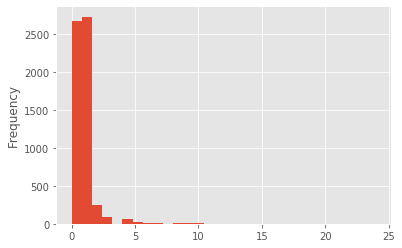

In [17]:
df_oficios['vinculo_count'].plot.hist(bins = 30)

In [18]:
df_oficios['vinculo_count'].describe()

count    5903.000000
mean        0.754870
std         1.259885
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        24.000000
Name: vinculo_count, dtype: float64

In [19]:
df_oficios.sort_values('vinculo_count', ascending = False)

,Recebimento,Assunto,Ofício,Advogado,Info,Status,line,vinculo,vinculo_count
5434,2019-11-26,FWD: [3-1905000028257] BR Data Request 638/19,638-19,Mohamad,"relaicionado #5501, #5672, #5717, #5763, #5767...",#7528,7528,"[5501, 5672, 5717, 5763, 5767, 5774, 5785, 595...",24
2613,2019-07-02,FWD: [2-3385000027068] BR Data Request 5053655...,700006978643,Helena,"relacionado a #5711, #5527, #5329, #5160, #503...",#6031,6031,"[5711, 5527, 5329, 5160, 5037, 4926, 4851, 468...",24
2535,2019-05-31,FWD: [3-5464000026240] BR Data Request 5053655...,700006868281_Redacted,Rafael,"relacionado a #5527, #5329, #5160, #5037, #492...",#5711,5711,"[5527, 5329, 5160, 5037, 4926, 4851, 4689, 463...",23
4772,2019-10-17,FWD: [2-5273000028444] BR Data Request: Proces...,929-19,Mohamad,"relacionado 5501, #5672, #5717, #5763, #5767, ...",#7178,7178,"[5501, 5672, 5717, 5763, 5767, 5774, 5785, 595...",20
2780,2019-07-10,FWD: [9-0368000026958] BR Data Request 0004435...,233-2019_Redacted,Helena,"relacionado a #4358, #4516, #5018, #5125, #512...",#6121,6121,"[4358, 4516, 5018, 5125, 5128, 5231, 5235, 534...",17
...,...,...,...,...,...,...,...,...,...
2584,2019-07-01,FWD: [2-9915000026625] [BRA] - [Official Lette...,0040237-59.2018.8.26.0224,Petrya,caso novo,#6022,6022,[],0
2585,2019-07-01,FWD: [9-7775000027089] BR Data Request 0003692...,728-2019_Redacted\n722-2019_Redacted,Mohamad,caso novo,#6023,6023,[],0
2586,2019-07-01,FWD: [7-8919000026833] BR Data Request 911-002...,008148-1911_2019,Rafael,caso novo,#6024,6024,[],0
2587,2019-07-01,FWD: [4-2368000026631] OFICIO - DECISÃO JUDICI...,0900292-33.2019.8.24.0039 b_Redacted,Rafael,caso novo,duplicidade/ respondido ao LIS,,[],0


In [20]:
df_counts = df_oficios.set_index('Recebimento').resample('D')['Assunto'].count() 
df_counts2 = df_oficios.set_index('Recebimento').resample('D')['vinculo_count'].sum() 

In [21]:
## dropping non business days:
df_countsBD = df_counts[df_counts.index.dayofweek < 5]

Text(0, 0.5, 'Contagem')

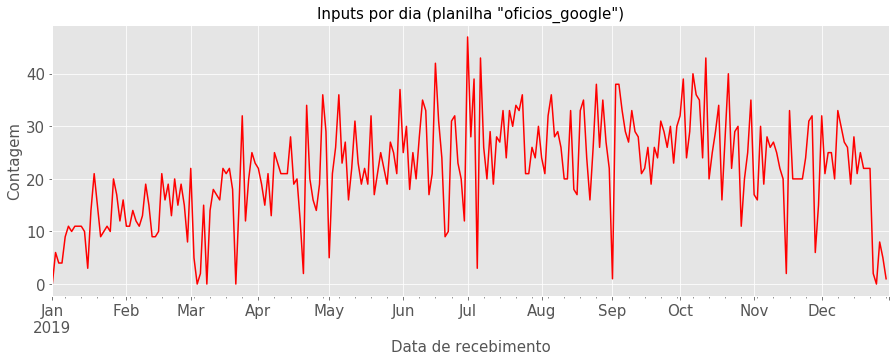

In [22]:
plt.figure(figsize = [15,5])
ax = df_countsBD.plot(color = 'r')
plt.title('Inputs por dia (planilha "oficios_google")', fontsize = 15)
#df_counts2.plot(color = 'b')
ax.set_xlim(['2019-01-01', '2019-12-31'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Data de recebimento', fontsize = 15)
plt.ylabel('Contagem', fontsize = 15)

In [23]:
df_countsBD['2019-01-01':].describe()

count    260.000000
mean      21.738462
std        9.504767
min        0.000000
25%       16.000000
50%       22.000000
75%       28.000000
max       47.000000
Name: Assunto, dtype: float64

In [24]:
df_oficios['Advogado'] = df_oficios['Advogado'].astype(str)

In [25]:
df_oficios[df_oficios['Advogado'].str.contains(' ')]

,Recebimento,Assunto,Ofício,Advogado,Info,Status,line,vinculo,vinculo_count
1955,2019-04-26,FWD: [1-7040000026315] [BRA] - [Official Lette...,NaN,Alice e Helena,caso novo,#5390,5390,[],0
1956,2019-04-26,FWD: RES: [6-7839000025998] Resposta ao seu pe...,NaN,Carina (*cadastro por Vitor),relacionado #5354,respondido ao LIS,,[5354],1
1960,2019-04-26,FWD: [9-7557000026137] Encaminha Decisão Judi...,NaN,Alice e Helena,relacionado #5285,duplicidade,,[5285],1
1961,2019-04-26,FWD: [2-2028000026158] BR Data Request 0000726...,NaN,Alice e Helena,relacionado #5292,respondido ao LIS,,[5292],1
1962,2019-04-26,FWD: [6-7727000026392] BR Data Request 1485/2019,NaN,Alice e Helena,caso novo,#5394,5394,[],0
3966,2019-09-09,RE: [0-9425000027944] BR EDR Received,2750397,(EDR response),NaN,NaN,,[],0
5096,2019-11-05,FWD: [6-3869000028374] BR Data Request 2019.07...,699016_2018_Redacted,Mohamad - LBCA,LBCA,enviado a Vic,,[],0
5130,2019-11-07,FWD: [6-3869000028374] BR Data Request: 2019.0...,699016_2018_Redacted,Mohamad - LBCA,LBCA,LBCA,,[],0


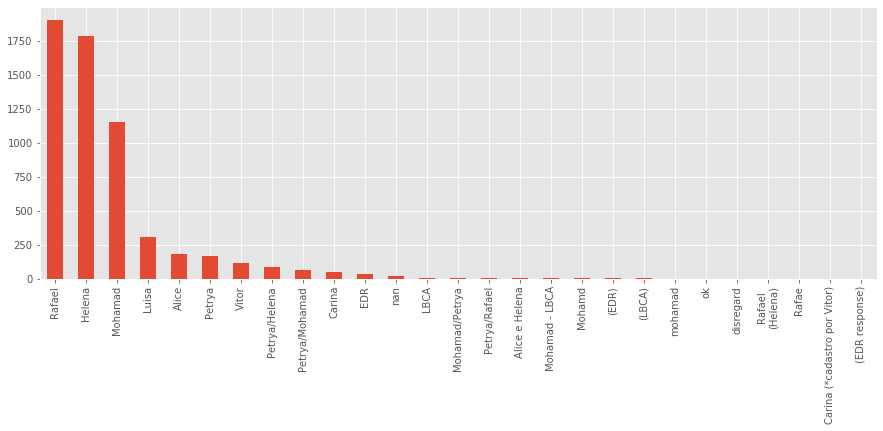

In [26]:
plt.figure(figsize = [15,5])
df_oficios['Advogado'].value_counts().plot(kind = 'bar')

In [27]:
top5_list = list(df_oficios['Advogado'].value_counts().nlargest(7).to_frame().index)

In [28]:
df_oficios_top5 = df_oficios[df_oficios['Advogado'].isin(top5_list)].reset_index(drop = True)

In [29]:
df_counts4 = df_oficios_top5.set_index('Recebimento').resample('M')['Advogado'].apply(list).to_frame()

df_counts4['Advogado'] = df_counts4['Advogado'].apply(Counter).to_frame()

df_test = json_normalize(df_counts4['Advogado'])
df_test2 = df_test.join(df_counts4.reset_index()).set_index('Recebimento').drop('Advogado', axis = 1)

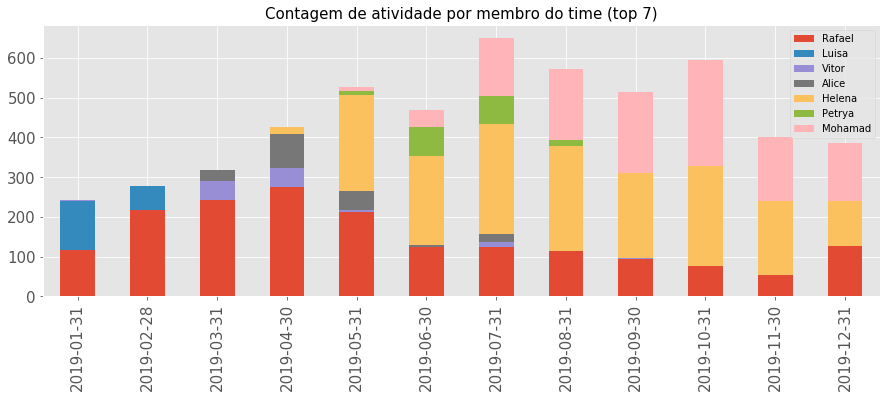

In [30]:
df_test2.index = df_test2.index.format()
df_test2[df_test2.index > '2019-01-01'].plot(kind = 'bar', stacked = True, figsize = [15,5])
plt.title('Contagem de atividade por membro do time (top 7)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper right')

In [31]:
df_oficios['vinculo_count'].describe()

count    5903.000000
mean        0.754870
std         1.259885
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        24.000000
Name: vinculo_count, dtype: float64

In [32]:
df_oficios['vinculo_count'].quantile(0.95)

2.0

In [33]:
len(df_oficios[df_oficios['vinculo_count'] >1])/len(df_oficios)

0.08283923428765035

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

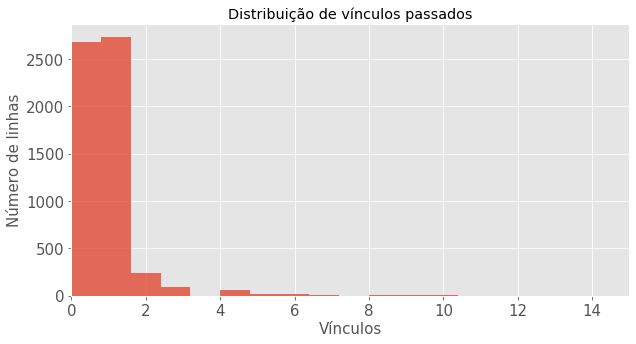

In [34]:
df_oficios['vinculo_count'].plot.hist(bins = 30, figsize = [10,5], alpha = 0.8)
plt.xlim([0,15])
plt.title('Distribuição de vínculos passados')
plt.xlabel('Vínculos', fontsize = 15)
plt.ylabel('Número de linhas', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [35]:
df_oficios.sort_values('vinculo_count', ascending = False)

,Recebimento,Assunto,Ofício,Advogado,Info,Status,line,vinculo,vinculo_count
5434,2019-11-26,FWD: [3-1905000028257] BR Data Request 638/19,638-19,Mohamad,"relaicionado #5501, #5672, #5717, #5763, #5767...",#7528,7528,"[5501, 5672, 5717, 5763, 5767, 5774, 5785, 595...",24
2613,2019-07-02,FWD: [2-3385000027068] BR Data Request 5053655...,700006978643,Helena,"relacionado a #5711, #5527, #5329, #5160, #503...",#6031,6031,"[5711, 5527, 5329, 5160, 5037, 4926, 4851, 468...",24
2535,2019-05-31,FWD: [3-5464000026240] BR Data Request 5053655...,700006868281_Redacted,Rafael,"relacionado a #5527, #5329, #5160, #5037, #492...",#5711,5711,"[5527, 5329, 5160, 5037, 4926, 4851, 4689, 463...",23
4772,2019-10-17,FWD: [2-5273000028444] BR Data Request: Proces...,929-19,Mohamad,"relacionado 5501, #5672, #5717, #5763, #5767, ...",#7178,7178,"[5501, 5672, 5717, 5763, 5767, 5774, 5785, 595...",20
2780,2019-07-10,FWD: [9-0368000026958] BR Data Request 0004435...,233-2019_Redacted,Helena,"relacionado a #4358, #4516, #5018, #5125, #512...",#6121,6121,"[4358, 4516, 5018, 5125, 5128, 5231, 5235, 534...",17
...,...,...,...,...,...,...,...,...,...
2584,2019-07-01,FWD: [2-9915000026625] [BRA] - [Official Lette...,0040237-59.2018.8.26.0224,Petrya,caso novo,#6022,6022,[],0
2585,2019-07-01,FWD: [9-7775000027089] BR Data Request 0003692...,728-2019_Redacted\n722-2019_Redacted,Mohamad,caso novo,#6023,6023,[],0
2586,2019-07-01,FWD: [7-8919000026833] BR Data Request 911-002...,008148-1911_2019,Rafael,caso novo,#6024,6024,[],0
2587,2019-07-01,FWD: [4-2368000026631] OFICIO - DECISÃO JUDICI...,0900292-33.2019.8.24.0039 b_Redacted,Rafael,caso novo,duplicidade/ respondido ao LIS,,[],0


### Looking at Trix:

In [36]:
df_trix

,line,Case # (DLBCA and Google reference),UID,Date of the Court Orders,Court,same court,Lawsuit Number,CP?,Summary of the request/what to produce [internal team rec],STQ confirm scope of production,...,Previous Orders and Answers,Google's proposed answer,LIS: \nInformatin about case,LIS: \nPolicy and content check,LIS: \nGoogle Inc answer sent to authority? which one?,LIS:\nPriority,LIS:\nAssignee,Status,Status - writ of mandamus,Law Firm
0,1,\n,NaN,NaN,2018-01-17 00:00:00,Yes,0009460-19.2013.403.6181,No,\n,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,"Andre reviewed and signed, but missing affidav...",Account status: live.,Speech: No CRC (Gmail) - No speech related inv...,May 23rd: Felipe shared content and letters wi...,P0,Completed\n(Felipe),LIS Status: May 22: waiting on Matt/Trev's dec...,A writ was not filed in this case,A writ was not filed in this case
1,2,6-9080000028545,valdeci.silvacampos@gmail.com\nevangelina.pinh...,1st Court Order – 11.23.2012\n2nd Court Order ...,5th Federal Criminal Court of São Paulo,Yes,0002618-91.2011.403.6181,No,Google received a court order to provide conte...,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,NaN,Speech: Not enough information. Nature of inve...,*all content preserved is linked to matters re...,Content and letters shared with OC. Download o...,P0 - 04,Completed \n(Keyla 5/20),"50,000 BRL Daily fine and threat of contempt. ...",DLBCA filed a writ of mandamus before TRF-3. I...,DLBCA
2,3,9-5821000001559 FPO Class Action Case,reichswehr88.blogspot.com.br,1st Court Order – 08.07.2013\n2nd Court Order ...,9th Federal Criminal Court of São Paulo,Yes,0007067-24.2013.403.6181,No,Google received court order to provide data/co...,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,https://docs.google.com/a/google.com/document/...,LIS preserved content.,Content: preserved for the same matter / Check...,Content and letters shared with OC. Download o...,P0 - 05,Completed \n(Felipe 5/19),"50,000 BRL daily fine and no threat of contemp...",DLBCA filed a writ of mandamus before TRF-3. D...,DLBCA
3,4,5-6191000002205,alvarado.alejandro@gmail.com,Court Order - 11.07.2013,8th Criminal Court of Goiânia - Goiás State,No,201003908777,No,Google received court order to provide and pre...,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,Andre reviewed and signed,LIS preserved content.,Content: CO asks for historical content + 15 d...,Content and letters shared with OC. Download o...,P0 - 03,Completed\n(Felipe 5/20),"10,000 BRL Daily fine and no threat of contemp...",DLBCA filed a writ of mandamus before TJGO. In...,DLBCA
4,5,[9-9709000000828] ),quarne.ba@gmail.com\njosemarcos.quarne@gmail.com,1st Court Order – 03.22.2013\n2nd Court Order ...,2nd Criminal Court of Salvador - Bahia State,No,0076690-72.2011.805.0001,No,NaN,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,Andre reviewed and signed,LIS preserved content.,Speech: Investigation of crimes against the ta...,May 21: Content and letters shared with OC. Do...,P1 - 04,Completed \n(Felipe),"10,000 BRL daily fine and no threat of contemp...",Not filed writ in this case,Not filed writ in this case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,7740,[7-9812000028504],"josxxx -- Gmail, emixxx -- Gmail, robxxx -- Gm...",Court Order 2019/12/09\n \nReceived: 2019/12/19\n,13ª Vara Federal de Curitiba/PR,NaN,5075998-22.2019.4.04.7000,NaN,NaN,LEGAL OPINION: \n1/ Background: This a Lava-Ja...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7615,7741,[6-8938000029130],"ferxxx -- Gmail, advxxx -- Gmail, CPF’s",Court Order 2019/11/25\n \nReceived: 2019/12/19\n,Vara dos Feitos Relativos a Delitos Praticados...,NaN,0330591-87.2019.8.05.0001,NaN,NaN,LEGAL OPINION: \n1/ Background: n/a\n \n2/ Leg...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7616,7742,[0-5628000028599],"elixxx -- Gmail, rahxxx -- Gmail, rhaxxx --Gma...",Court Order 2019/12/17\n \nReceived: 2019/12/19\n,1ª Vara

In [37]:
df_trix.columns

Index(['line', 'Case # (DLBCA and Google reference)', 'UID',
       'Date of the Court Orders', 'Court', 'same court', 'Lawsuit Number',
       'CP?', 'Summary of the request/what to produce [internal team rec]',
       'STQ confirm scope of production', 'Deadline',
       'DLBCA's suggested answer', 'Previous Orders and Answers',
       'Google's proposed answer', 'LIS: \nInformatin about case',
       'LIS: \nPolicy and content check',
       'LIS: \nGoogle Inc answer sent to authority? which one?',
       'LIS:\nPriority', 'LIS:\nAssignee', 'Status',
       'Status - writ of mandamus', 'Law Firm'],
      dtype='object')

In [38]:
df_trix[df_trix['line'] == '7539']

,line,Case # (DLBCA and Google reference),UID,Date of the Court Orders,Court,same court,Lawsuit Number,CP?,Summary of the request/what to produce [internal team rec],STQ confirm scope of production,...,Previous Orders and Answers,Google's proposed answer,LIS: \nInformatin about case,LIS: \nPolicy and content check,LIS: \nGoogle Inc answer sent to authority? which one?,LIS:\nPriority,LIS:\nAssignee,Status,Status - writ of mandamus,Law Firm
7418,7539,[2-8329000028261],"357xxx980, 352xxx030, 352xxx160, 359xxx910",Court Order\n2019/11/26 received 2019/11/27,1ª Vara da Comarca de São Manuel - SP,NaN,0002113-66.2019.8.26.0581,NaN,NaN,LEGAL OPINION: \n\n1/ Background: n/a\n\n \n\n...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
PrintRows(df_trix, '7539')

line (column name)
7539
-------------
 
 
Case # (DLBCA and Google reference) (column name)
[2-8329000028261]
-------------
 
 
UID (column name)
357xxx980, 352xxx030, 352xxx160, 359xxx910
-------------
 
 
Date of the Court Orders (column name)
Court Order2019/11/26 received 2019/11/27
-------------
 
 
Court (column name)
1ª Vara da Comarca de São Manuel - SP
-------------
 
 
same court (column name)
nan
-------------
 
 
Lawsuit Number (column name)
0002113-66.2019.8.26.0581
-------------
 
 
CP? (column name)
nan
-------------
 
 
Summary of the request/what to produce [internal team rec] (column name)
nan
-------------
 
 
STQ confirm scope of production (column name)
LEGAL OPINION: 1/ Background: n/a 2/ Legal risk: n/a 3/ Legal issue: There could be a legal issue, in this case, depending on the interpretation of the order. We understand that LIS could either: (i) ask for clarification about the date range of the production and anticipate that only future communication content is

### Looking at "controle de linhas" spreadsheet

In [40]:
df_controle

,Advogado,line,Extensão,Nº Principal do Processo,Objeto,Observações ref. ao objeto,Localização,UF,Prazo MS,Deadline,Data,Status/Estratégia,Solicitações e Considerações (Carina),Peticionar?,Data do Protocolo,Acompanhamento?
0,Helena,6698,NaN,5042387-09.2019.4.02.5101,future data,NaN,8ª Vara Federal Criminal do Rio de Janeiro,RJ,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Helena,6700,NaN,0005384-85.2019.8.16.0153,future data,NaN,Vara Criminal de Santo Antônio da Platina - PR,PR,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mohamad,6705,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Helena,6714,NaN,0105844-13.2019.8.21.0001 (001/2.19.0068301-4),passwords,NaN,17ª Vara Criminal do Foro Central de Comarca d...,RS,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mohamad,6713,NaN,0001588-12.2019.8.26.0411,future data,NaN,1ª Vara da Comarca de Pacaembu - SP,SP,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Mohamad,7761,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Mohamad,7764,NaN,0004669-93.2019.8.19.0077,clarification,NaN,2ª Vara da Comarca de Seropédica - RJ,RJ,2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Rafa,7765,NaN,0148164-78.2019.8.21.0001,future data,NaN,1ª Vara Criminal de Porto Alegre - RS,RS,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Mohamad,7770,NaN,5004055-63.2019.8.24.0012/SC,RLH,NaN,Juízo de Direito do Plantão Judiciário de Caça...,SC,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_controle.drop_duplicates(subset = ['line'])

,Advogado,line,Extensão,Nº Principal do Processo,Objeto,Observações ref. ao objeto,Localização,UF,Prazo MS,Deadline,Data,Status/Estratégia,Solicitações e Considerações (Carina),Peticionar?,Data do Protocolo,Acompanhamento?
0,Helena,6698,NaN,5042387-09.2019.4.02.5101,future data,NaN,8ª Vara Federal Criminal do Rio de Janeiro,RJ,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Helena,6700,NaN,0005384-85.2019.8.16.0153,future data,NaN,Vara Criminal de Santo Antônio da Platina - PR,PR,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mohamad,6705,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Helena,6714,NaN,0105844-13.2019.8.21.0001 (001/2.19.0068301-4),passwords,NaN,17ª Vara Criminal do Foro Central de Comarca d...,RS,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mohamad,6713,NaN,0001588-12.2019.8.26.0411,future data,NaN,1ª Vara da Comarca de Pacaembu - SP,SP,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Mohamad,7761,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Mohamad,7764,NaN,0004669-93.2019.8.19.0077,clarification,NaN,2ª Vara da Comarca de Seropédica - RJ,RJ,2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Rafa,7765,NaN,0148164-78.2019.8.21.0001,future data,NaN,1ª Vara Criminal de Porto Alegre - RS,RS,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Mohamad,7770,NaN,5004055-63.2019.8.24.0012/SC,RLH,NaN,Juízo de Direito do Plantão Judiciário de Caça...,SC,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_controle['Objeto'] = df_controle['Objeto'].str.lower()
df_controle['Objeto'] = df_controle['Objeto'].str.strip()

In [43]:
df_controle['Objeto'].value_counts().to_frame()

,Objeto
future data,150
passwords,28
reverse location,23
detenção,19
authority,17
clarification,4
passwords and future data,4
gil,3
reverse locarion,3
future data and passwords,2


In [44]:
df_controle['line'] = df_controle['line'].astype(str)

In [45]:
PrintRows(df_controle, '7539')

Advogado (column name)
Mohamad
-------------
 
 
line (column name)
7539
-------------
 
 
Extensão (column name)
nan
-------------
 
 
Nº Principal do Processo (column name)
0002113-66.2019.8.26.0581
-------------
 
 
Objeto (column name)
future data
-------------
 
 
Observações ref. ao objeto (column name)
nan
-------------
 
 
Localização (column name)
1ª Vara da Comarca de São Manuel - SP
-------------
 
 
UF (column name)
SP
-------------
 
 
Prazo MS (column name)
2020-03-25
-------------
 
 
Deadline (column name)
nan
-------------
 
 
Data (column name)
nan
-------------
 
 
Status/Estratégia (column name)
nan
-------------
 
 
Solicitações e Considerações (Carina) (column name)
nan
-------------
 
 
Peticionar? (column name)
nan
-------------
 
 
Data do Protocolo (column name)
nan
-------------
 
 
Acompanhamento? (column name)
nan
-------------
 
 


### contrasting "controle" - "oficios" - "Trix" columns:

In [46]:
df_controle.columns

Index(['Advogado', 'line', 'Extensão', 'Nº Principal do Processo', 'Objeto',
       'Observações ref. ao objeto', 'Localização', 'UF', 'Prazo MS',
       'Deadline', 'Data', 'Status/Estratégia',
       'Solicitações e Considerações (Carina)', 'Peticionar?',
       'Data do Protocolo', 'Acompanhamento?'],
      dtype='object')

In [47]:
df_oficios.columns

Index(['Recebimento', 'Assunto', 'Ofício', 'Advogado', 'Info', 'Status',
       'line', 'vinculo', 'vinculo_count'],
      dtype='object')

In [48]:
df_trix.columns

Index(['line', 'Case # (DLBCA and Google reference)', 'UID',
       'Date of the Court Orders', 'Court', 'same court', 'Lawsuit Number',
       'CP?', 'Summary of the request/what to produce [internal team rec]',
       'STQ confirm scope of production', 'Deadline',
       'DLBCA's suggested answer', 'Previous Orders and Answers',
       'Google's proposed answer', 'LIS: \nInformatin about case',
       'LIS: \nPolicy and content check',
       'LIS: \nGoogle Inc answer sent to authority? which one?',
       'LIS:\nPriority', 'LIS:\nAssignee', 'Status',
       'Status - writ of mandamus', 'Law Firm'],
      dtype='object')

In [49]:
df_controle

,Advogado,line,Extensão,Nº Principal do Processo,Objeto,Observações ref. ao objeto,Localização,UF,Prazo MS,Deadline,Data,Status/Estratégia,Solicitações e Considerações (Carina),Peticionar?,Data do Protocolo,Acompanhamento?
0,Helena,6698,NaN,5042387-09.2019.4.02.5101,future data,NaN,8ª Vara Federal Criminal do Rio de Janeiro,RJ,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Helena,6700,NaN,0005384-85.2019.8.16.0153,future data,NaN,Vara Criminal de Santo Antônio da Platina - PR,PR,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mohamad,6705,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Helena,6714,NaN,0105844-13.2019.8.21.0001 (001/2.19.0068301-4),passwords,NaN,17ª Vara Criminal do Foro Central de Comarca d...,RS,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mohamad,6713,NaN,0001588-12.2019.8.26.0411,future data,NaN,1ª Vara da Comarca de Pacaembu - SP,SP,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Mohamad,7761,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Mohamad,7764,NaN,0004669-93.2019.8.19.0077,clarification,NaN,2ª Vara da Comarca de Seropédica - RJ,RJ,2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Rafa,7765,NaN,0148164-78.2019.8.21.0001,future data,NaN,1ª Vara Criminal de Porto Alegre - RS,RS,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Mohamad,7770,NaN,5004055-63.2019.8.24.0012/SC,rlh,NaN,Juízo de Direito do Plantão Judiciário de Caça...,SC,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_join1 = df_controle.merge(df_trix, on = 'line', how = 'left')

In [51]:
df_join1

,Advogado,line,Extensão,Nº Principal do Processo,Objeto,Observações ref. ao objeto,Localização,UF,Prazo MS,Deadline_x,...,Previous Orders and Answers,Google's proposed answer,LIS: \nInformatin about case,LIS: \nPolicy and content check,LIS: \nGoogle Inc answer sent to authority? which one?,LIS:\nPriority,LIS:\nAssignee,Status,Status - writ of mandamus,Law Firm
0,Helena,6698,NaN,5042387-09.2019.4.02.5101,future data,NaN,8ª Vara Federal Criminal do Rio de Janeiro,RJ,2020-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Helena,6700,NaN,0005384-85.2019.8.16.0153,future data,NaN,Vara Criminal de Santo Antônio da Platina - PR,PR,2020-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mohamad,6705,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Helena,6714,NaN,0105844-13.2019.8.21.0001 (001/2.19.0068301-4),passwords,NaN,17ª Vara Criminal do Foro Central de Comarca d...,RS,2020-02-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mohamad,6713,NaN,0001588-12.2019.8.26.0411,future data,NaN,1ª Vara da Comarca de Pacaembu - SP,SP,2020-02-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Mohamad,7761,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-04-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Mohamad,7764,NaN,0004669-93.2019.8.19.0077,clarification,NaN,2ª Vara da Comarca de Seropédica - RJ,RJ,2020-12-14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Rafa,7765,NaN,0148164-78.2019.8.21.0001,future data,NaN,1ª Vara Criminal de Porto Alegre - RS,RS,2020-04-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Mohamad,7770,NaN,5004055-63.2019.8.24.0012/SC,rlh,NaN,Juízo de Direito do Plantão Judiciário de Caça...,SC,2020-04-17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_join1.columns

Index(['Advogado', 'line', 'Extensão', 'Nº Principal do Processo', 'Objeto',
       'Observações ref. ao objeto', 'Localização', 'UF', 'Prazo MS',
       'Deadline_x', 'Data', 'Status/Estratégia',
       'Solicitações e Considerações (Carina)', 'Peticionar?',
       'Data do Protocolo', 'Acompanhamento?',
       'Case # (DLBCA and Google reference)', 'UID',
       'Date of the Court Orders', 'Court', 'same court', 'Lawsuit Number',
       'CP?', 'Summary of the request/what to produce [internal team rec]',
       'STQ confirm scope of production', 'Deadline_y',
       'DLBCA's suggested answer', 'Previous Orders and Answers',
       'Google's proposed answer', 'LIS: \nInformatin about case',
       'LIS: \nPolicy and content check',
       'LIS: \nGoogle Inc answer sent to authority? which one?',
       'LIS:\nPriority', 'LIS:\nAssignee', 'Status',
       'Status - writ of mandamus', 'Law Firm'],
      dtype='object')

In [53]:
df_controle['line'] = df_controle['line'].astype(str)

In [54]:
df_join1.columns

Index(['Advogado', 'line', 'Extensão', 'Nº Principal do Processo', 'Objeto',
       'Observações ref. ao objeto', 'Localização', 'UF', 'Prazo MS',
       'Deadline_x', 'Data', 'Status/Estratégia',
       'Solicitações e Considerações (Carina)', 'Peticionar?',
       'Data do Protocolo', 'Acompanhamento?',
       'Case # (DLBCA and Google reference)', 'UID',
       'Date of the Court Orders', 'Court', 'same court', 'Lawsuit Number',
       'CP?', 'Summary of the request/what to produce [internal team rec]',
       'STQ confirm scope of production', 'Deadline_y',
       'DLBCA's suggested answer', 'Previous Orders and Answers',
       'Google's proposed answer', 'LIS: \nInformatin about case',
       'LIS: \nPolicy and content check',
       'LIS: \nGoogle Inc answer sent to authority? which one?',
       'LIS:\nPriority', 'LIS:\nAssignee', 'Status',
       'Status - writ of mandamus', 'Law Firm'],
      dtype='object')

In [55]:
df_join2 = df_join1.merge(df_controle, how = 'left', on = 'line')

In [56]:
df_join2

,Advogado_x,line,Extensão_x,Nº Principal do Processo_x,Objeto_x,Observações ref. ao objeto_x,Localização_x,UF_x,Prazo MS_x,Deadline_x,...,Localização_y,UF_y,Prazo MS_y,Deadline,Data_y,Status/Estratégia_y,Solicitações e Considerações (Carina)_y,Peticionar?_y,Data do Protocolo_y,Acompanhamento?_y
0,Helena,6698,NaN,5042387-09.2019.4.02.5101,future data,NaN,8ª Vara Federal Criminal do Rio de Janeiro,RJ,2020-01-01,NaN,...,8ª Vara Federal Criminal do Rio de Janeiro,RJ,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Helena,6700,NaN,0005384-85.2019.8.16.0153,future data,NaN,Vara Criminal de Santo Antônio da Platina - PR,PR,2020-01-01,NaN,...,Vara Criminal de Santo Antônio da Platina - PR,PR,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mohamad,6705,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-01-01,NaN,...,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Helena,6714,NaN,0105844-13.2019.8.21.0001 (001/2.19.0068301-4),passwords,NaN,17ª Vara Criminal do Foro Central de Comarca d...,RS,2020-02-01,NaN,...,17ª Vara Criminal do Foro Central de Comarca d...,RS,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mohamad,6713,NaN,0001588-12.2019.8.26.0411,future data,NaN,1ª Vara da Comarca de Pacaembu - SP,SP,2020-02-01,NaN,...,1ª Vara da Comarca de Pacaembu - SP,SP,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Mohamad,7761,NaN,1000531-59.2019.4.04.4100,future data,NaN,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-04-17,NaN,...,3ª Vara Criminal e Execução Penal da Seção Jud...,RO,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Mohamad,7764,NaN,0004669-93.2019.8.19.0077,clarification,NaN,2ª Vara da Comarca de Seropédica - RJ,RJ,2020-12-14,NaN,...,2ª Vara da Comarca de Seropédica - RJ,RJ,2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,Rafa,7765,NaN,0148164-78.2019.8.21.0001,future data,NaN,1ª Vara Criminal de Porto Alegre - RS,RS,2020-04-17,NaN,...,1ª Vara Criminal de Porto Alegre - RS,RS,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,Mohamad,7770,NaN,5004055-63.2019.8.24.0012/SC,rlh,NaN,Juízo de Direito do Plantão Judiciário de Caça...,SC,2020-04-17,NaN,...,Juízo de Direito do Plantão Judiciário de Caça...,SC,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_join2['Advogado_y'].value_counts()

Mohamad          128
Helena           110
Rafael            19
Rafa              14
Helena\n           7
LBCA               1
Helena/Petrya      1
Vitor              1
Name: Advogado_y, dtype: int64

In [58]:
df_join2['Advogado_x'].value_counts()

Mohamad          128
Helena           110
Rafael            19
Rafa              14
Helena\n           7
LBCA               1
Helena/Petrya      1
Vitor              1
Name: Advogado_x, dtype: int64

In [59]:
line = '7592'

In [60]:
PrintRows(df_oficios, line)

Recebimento (column name)
2019-12-04 00:00:00
-------------
 
 
Assunto (column name)
FWD: [6-3789000028841] BR Data Request: 1001770-92.2019.8.26.0374 - PIC 11.10
-------------
 
 
Ofício (column name)
Decisão 04.12.19 - Quebra de sigilo de dados estátivos - 1001770-92.2019.8.26.0374938_2019
-------------
 
 
Advogado (column name)
Helena
-------------
 
 
Info (column name)
caso novo
-------------
 
 
Status (column name)
#7592
-------------
 
 
line (column name)
7592
-------------
 
 
vinculo (column name)
[]
-------------
 
 
vinculo_count (column name)
0
-------------
 
 


In [61]:
PrintRows(df_controle, line)

Line not present. Please choose another one
 


In [62]:
PrintRows(df_trix, line)

line (column name)
7592
-------------
 
 
Case # (DLBCA and Google reference) (column name)
[6-3789000028841]
-------------
 
 
UID (column name)
achxxx -- Non Google Product, carxxx -- Non Google Product, valxxx -- Hotmail, valxxx -- Gmail, valxxx -- Gmail, claxxx -- Hotmail, lucxxx -- Hotmail, gilxxx -- Gmail, polxxx -- Gmail, daixxx -- Gmail
-------------
 
 
Date of the Court Orders (column name)
Court Order 2019/12/03 Received: 2019/12/04
-------------
 
 
Court (column name)
: Vara Única da Comarca de Morro Agudo/SP
-------------
 
 
same court (column name)
nan
-------------
 
 
Lawsuit Number (column name)
1001770-92.2019.8.26.0374
-------------
 
 
CP? (column name)
nan
-------------
 
 
Summary of the request/what to produce [internal team rec] (column name)
nan
-------------
 
 
STQ confirm scope of production (column name)
LEGAL OPINION: 1/ Background: n/a 2/ Legal risk: n/a 3/ Legal issue: n/a 4/ Additional information:  •	NOI was confirmed as nature of the case on LERS.  

In [63]:
df_trix

,line,Case # (DLBCA and Google reference),UID,Date of the Court Orders,Court,same court,Lawsuit Number,CP?,Summary of the request/what to produce [internal team rec],STQ confirm scope of production,...,Previous Orders and Answers,Google's proposed answer,LIS: \nInformatin about case,LIS: \nPolicy and content check,LIS: \nGoogle Inc answer sent to authority? which one?,LIS:\nPriority,LIS:\nAssignee,Status,Status - writ of mandamus,Law Firm
0,1,\n,NaN,NaN,2018-01-17 00:00:00,Yes,0009460-19.2013.403.6181,No,\n,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,"Andre reviewed and signed, but missing affidav...",Account status: live.,Speech: No CRC (Gmail) - No speech related inv...,May 23rd: Felipe shared content and letters wi...,P0,Completed\n(Felipe),LIS Status: May 22: waiting on Matt/Trev's dec...,A writ was not filed in this case,A writ was not filed in this case
1,2,6-9080000028545,valdeci.silvacampos@gmail.com\nevangelina.pinh...,1st Court Order – 11.23.2012\n2nd Court Order ...,5th Federal Criminal Court of São Paulo,Yes,0002618-91.2011.403.6181,No,Google received a court order to provide conte...,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,NaN,Speech: Not enough information. Nature of inve...,*all content preserved is linked to matters re...,Content and letters shared with OC. Download o...,P0 - 04,Completed \n(Keyla 5/20),"50,000 BRL Daily fine and threat of contempt. ...",DLBCA filed a writ of mandamus before TRF-3. I...,DLBCA
2,3,9-5821000001559 FPO Class Action Case,reichswehr88.blogspot.com.br,1st Court Order – 08.07.2013\n2nd Court Order ...,9th Federal Criminal Court of São Paulo,Yes,0007067-24.2013.403.6181,No,Google received court order to provide data/co...,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,https://docs.google.com/a/google.com/document/...,LIS preserved content.,Content: preserved for the same matter / Check...,Content and letters shared with OC. Download o...,P0 - 05,Completed \n(Felipe 5/19),"50,000 BRL daily fine and no threat of contemp...",DLBCA filed a writ of mandamus before TRF-3. D...,DLBCA
3,4,5-6191000002205,alvarado.alejandro@gmail.com,Court Order - 11.07.2013,8th Criminal Court of Goiânia - Goiás State,No,201003908777,No,Google received court order to provide and pre...,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,Andre reviewed and signed,LIS preserved content.,Content: CO asks for historical content + 15 d...,Content and letters shared with OC. Download o...,P0 - 03,Completed\n(Felipe 5/20),"10,000 BRL Daily fine and no threat of contemp...",DLBCA filed a writ of mandamus before TJGO. In...,DLBCA
4,5,[9-9709000000828] ),quarne.ba@gmail.com\njosemarcos.quarne@gmail.com,1st Court Order – 03.22.2013\n2nd Court Order ...,2nd Criminal Court of Salvador - Bahia State,No,0076690-72.2011.805.0001,No,NaN,NaN,...,https://drive.google.com/a/dlbca.com.br/?tab=m...,Andre reviewed and signed,LIS preserved content.,Speech: Investigation of crimes against the ta...,May 21: Content and letters shared with OC. Do...,P1 - 04,Completed \n(Felipe),"10,000 BRL daily fine and no threat of contemp...",Not filed writ in this case,Not filed writ in this case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,7740,[7-9812000028504],"josxxx -- Gmail, emixxx -- Gmail, robxxx -- Gm...",Court Order 2019/12/09\n \nReceived: 2019/12/19\n,13ª Vara Federal de Curitiba/PR,NaN,5075998-22.2019.4.04.7000,NaN,NaN,LEGAL OPINION: \n1/ Background: This a Lava-Ja...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7615,7741,[6-8938000029130],"ferxxx -- Gmail, advxxx -- Gmail, CPF’s",Court Order 2019/11/25\n \nReceived: 2019/12/19\n,Vara dos Feitos Relativos a Delitos Praticados...,NaN,0330591-87.2019.8.05.0001,NaN,NaN,LEGAL OPINION: \n1/ Background: n/a\n \n2/ Leg...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7616,7742,[0-5628000028599],"elixxx -- Gmail, rahxxx -- Gmail, rhaxxx --Gma...",Court Order 2019/12/17\n \nReceived: 2019/12/19\n,1ª Vara

In [79]:
df_trix['Lawsuit Number']

0        0009460-19.2013.403.6181
1        0002618-91.2011.403.6181
2        0007067-24.2013.403.6181
3                    201003908777
4        0076690-72.2011.805.0001
                  ...            
7614    5075998-22.2019.4.04.7000
7615    0330591-87.2019.8.05.0001
7616        505-23.2019.4.01.3601
7617        505-23.2019.4.01.3601
7618    0000457-61.2019.8.17.1410
Name: Lawsuit Number, Length: 7619, dtype: object

In [203]:
def FindLawsuit(input_string):
    
    regex_expression = '\d+-\d+\.\d+\.\d+\.\d+\.\d+'
    regex_expression2 = '\d+-\d+\.\d+\.\d+\.\d+'
    regex_expression3 = '\d+\.\d+\.\d+\.\d+\-\d+'
    regex_expression4 = '\d+-\d+\.\d+\.\d+'
    regex_expression5 = '\d+/\d+\.\d+\.\d+-\d+'
    regex_expression6 = '\d+\.\d+\.\d+-\d+'
    
    
    try:
        numbers_list = re.findall(regex_expression, input_string)
        numbers_list2 = re.findall(regex_expression2, input_string)
        numbers_list3 = re.findall(regex_expression3, input_string)
        numbers_list4 = re.findall(regex_expression4, input_string)
        numbers_list5 = re.findall(regex_expression5, input_string)
        numbers_list6 = re.findall(regex_expression6, input_string)
        numbers_list = numbers_list + numbers_list2 + numbers_list3 + numbers_list4 +\
                       numbers_list5 + numbers_list6
        numbers_list = [item for item in numbers_list if item != '']
                
    except:
        numbers_list = ['']
        
        
    if len(numbers_list) == 0:
        numbers_list = ['']
        
    return numbers_list[0]

In [204]:
test = '[0275725-42.2888019.8.19.0001]'
test2 = '2017.01.1.040625-3'
test3 = '5001404-22.2019.7005'
test4 = '0549.19.000521-1'
test5 = '023/2.14.0005897-1'

In [206]:
FindLawsuit(test5)

'023/2.14.0005897-1'

In [207]:
df_trix2 = df_trix.copy()

In [208]:
df_trix2['Lawsuit Number'] = df_trix2['Lawsuit Number'].astype(str)

In [209]:
df_trix2['found_lawsuit'] = df_trix2['Lawsuit Number'].apply(FindLawsuit).to_frame()


In [210]:
df_lawsuit = df_trix2.loc[:, ['Lawsuit Number', 'found_lawsuit']]

In [211]:
df_lawsuit

,Lawsuit Number,found_lawsuit
0,0009460-19.2013.403.6181,0009460-19.2013.403.6181
1,0002618-91.2011.403.6181,0002618-91.2011.403.6181
2,0007067-24.2013.403.6181,0007067-24.2013.403.6181
3,201003908777,
4,0076690-72.2011.805.0001,0076690-72.2011.805.0001
...,...,...
7614,5075998-22.2019.4.04.7000,5075998-22.2019.4.04.7000
7615,0330591-87.2019.8.05.0001,0330591-87.2019.8.05.0001
7616,505-23.2019.4.01.3601,505-23.2019.4.01.3601
7617,505-23.2019.4.01.3601,505-23.2019.4.01.3601


In [212]:
df_lawsuit['matching'] = df_lawsuit['Lawsuit Number'] == df_lawsuit['found_lawsuit']

In [213]:
df_lawsuit['matching'].value_counts()

True     5560
False    2059
Name: matching, dtype: int64

In [214]:
df_false = df_lawsuit[df_lawsuit['matching'] == False].reset_index(drop = True)
df_false

,Lawsuit Number,found_lawsuit,matching
0,201003908777,,False
1,MS n.º 20.116/STJ,,False
2,38.0004.0002538/2014-6,,False
3,2013.4927-8,,False
4,51/13,,False
...,...,...,...
2054,159/2.19.00000959-6 9 (CNJ 0002497-72.2019.8.2...,0002497-72.2019.8.21.0159,False
2055,029/2.19.0005227-0 (CNJ: 0012049-63.2019.8.21....,0012049-63.2019.8.21.0029,False
2056,17488/2017,,False
2057,002419.104.234-0 (CNJ n. 1042340-66.2019.8.13....,1042340-66.2019.8.13.0024,False


In [215]:
for k in range(0, len(df_false)):
    print(df_false['Lawsuit Number'][k], '>>>', df_false['found_lawsuit'][k])
    

201003908777 >>> 
MS n.º 20.116/STJ >>> 
38.0004.0002538/2014-6 >>> 
2013.4927-8 >>> 
51/13 >>> 
51/13 >>> 
0365/2013-4 >>> 
2013.977-2 >>> 
5th Federal Criminal Court of São Paulo  >>> 
2014.01.525.649 >>> 
2013.34683-3 >>> 
5015665-80.2014.404.7000/PR >>> 5015665-80.2014.404.7000
IP 69/14 >>> 
0013905-95.2014.8.24.0080-002 >>> 0013905-95.2014.8.24.0080
2013316 >>> 
5002029-35.2014.404.7004/PR >>> 5002029-35.2014.404.7004
0000475-60.2014.8.24.0053-029 >>> 0000475-60.2014.8.24.0053
906-01786/2014 >>> 
2014.01.525.649 >>> 
201401733861 >>> 
5002029-35.2014.404.7004/PR >>> 5002029-35.2014.404.7004
5002029-35.2014.404.7004/PR >>> 5002029-35.2014.404.7004
00735/14 >>> 
5002029-35.2014.404.7004/PR >>> 5002029-35.2014.404.7004
2013316 >>> 
119.07.2014.6.20.0033 >>> 
IP 69/14 >>> 
2013.468-1 >>> 
0117676-46.2014.8.20.0001-786/2014 >>> 0117676-46.2014.8.20.0001
0100828-30.2014.8.20.0115-002 >>> 0100828-30.2014.8.20.0115
306/2014 >>> 
nan >>> 
1st  >>> 
0011.000516-6/2014 >>> 
201421200617 >>> 

1.093/16 >>> 
5059502-49.2018.4.04.7000  >>> 5059502-49.2018.4.04.7000
0001/2.18.0080712-9 (CNJ0149486-70.2018.8.21.0001) >>> 0149486-70.2018.8.21.0001
7445/2019 >>> 
104/2.18.0001010-0 (CNJ 0002863-19.2018.8.21.0104) >>> 0002863-19.2018.8.21.0104
1.093/16 >>> 
001/2.18.0112289-8 (CNJ 0200839-52.2018.8.21.0001) >>> 0200839-52.2018.8.21.0001
Ocorrência n. 397/2019 >>> 
323/2019.00003-2 >>> 
00093857120188080024 >>> 
1.093/16 >>> 
BO 126.2018.6279 >>> 
1.093/16 >>> 
141/2.19.00000044-4 (CNJ0000084-43.2019.8.21.0141)  >>> 0000084-43.2019.8.21.0141
nan >>> 
nan >>> 
Protocolo nº 655395/2018 >>> 
00222604120188140401 >>> 
001/2.19.0006404-7 (CNJ 0010355-46.2019.8.21.0001) >>> 0010355-46.2019.8.21.0001
PIC nº 1.093/16 >>> 
2217.33.2019.4.01.3800 >>> 
0000198.15.2019.812.0017 >>> 
External Reference Number: 9613120184036000 >>> 
53/123/19 >>> 
113/2.18.0001515-2 (CNJ 0002966-96.2018.8.21.0113) >>> 0002966-96.2018.8.21.0113
051/2.19.0000054-0 (CNJ: 0000167-38.2019.8.21.0051 >>> 0000167-38.2019

In [219]:
1 - len(df_false)/len(df_trix)

0.7297545609660061

In [220]:
1 - len(df_false[df_false['found_lawsuit'] == ''])/len(df_trix)

0.8350177188607428

### Checando campos em branco: avaliar necessidade de tais campos no sistema

### Structuring a dataframe to create a data dictionary:

In [64]:
## origin: de onde é extraído este dado? Extração direta de um documento, inferido a partir de um documento ou
## construído internamente
##
## stage: em que estágio ele é obtido? 

In [65]:
def DataDictForm(df, sheet_name):
    
    ## checking blank fields
    df_frac = df.isna().sum().to_frame().reset_index()
    len_df = len(df_frac)

    df_frac.columns = ['column_name', 'fraction_not_filled']
    df_frac['fraction_not_filled'] = df_frac['fraction_not_filled']/df.shape[0]
    df_frac['sheet'] = [sheet_name]*len_df
    df_frac['description'] = ['']*len_df
    df_frac['origin'] = ['']*len_df
    df_frac['stage'] = ['']*len_df
    df_frac['useful?'] = ['']*len_df
    df_frac = df_frac.loc[:, ['sheet', 'column_name',\
                                        'fraction_not_filled', 'description', 'origin',\
                                       'stage', 'useful?']]

    return df_frac  
    
    

In [66]:
df_trix_dict = DataDictForm(df_trix, 'trix_content')
df_trix2_dict = DataDictForm(df_trix2, 'trix_boletosads')
df_trix3_dict = DataDictForm(df_trix3, 'trix_writs')
df_trix4_dict = DataDictForm(df_trix4, 'trix_segmentation')
df_controle_dict = DataDictForm(df_controle, 'controle_de_linhas')
df_oficios_dict = DataDictForm(df_oficios, 'oficios_google')

In [67]:
df_trix_dict

,sheet,column_name,fraction_not_filled,description,origin,stage,useful?
0,trix_content,line,0.000394,,,,
1,trix_content,Case # (DLBCA and Google reference),0.614779,,,,
2,trix_content,UID,0.011025,,,,
3,trix_content,Date of the Court Orders,0.008006,,,,
4,trix_content,Court,0.006694,,,,
5,trix_content,same court,0.985956,,,,
6,trix_content,Lawsuit Number,0.009581,,,,
7,trix_content,CP?,0.974144,,,,
8,trix_content,Summary of the request/what to produce [intern...,0.434965,,,,
9,trix_content,STQ confirm scope of production,0.033863,,,,


In [68]:
df_trix2_dict

,sheet,column_name,fraction_not_filled,description,origin,stage,useful?
0,trix_boletosads,Case # (CQ reference)/thread LIS,0.000000,,,,
1,trix_boletosads,Medium/low priority,0.000000,,,,
2,trix_boletosads,Court/LE,0.000000,,,,
3,trix_boletosads,Lawsuit number,0.000000,,,,
4,trix_boletosads,Boleto number/target,0.000000,,,,
5,trix_boletosads,Date received,0.000000,,,,
6,trix_boletosads,Date received CQ,0.000000,,,,
7,trix_boletosads,Response is good to go,0.000000,,,,
8,trix_boletosads,Deadeline,0.000000,,,,
9,trix_boletosads,Response delivered,0.000000,,,,


In [69]:
df_trix3_dict

,sheet,column_name,fraction_not_filled,description,origin,stage,useful?
0,trix_writs,Case #,0.000000,,,,
1,trix_writs,UID,0.000000,,,,
2,trix_writs,Date of the Court Orders,0.000000,,,,
3,trix_writs,Kwyjibo Reference #,0.000000,,,,
4,trix_writs,Court,0.000000,,,,
5,trix_writs,Lawsuit Number,0.000000,,,,
6,trix_writs,Legal issue/Summary of the request/Data produced,0.000000,,,,
7,trix_writs,Writ filed by CQ/date,0.000000,,,,
8,trix_writs,Daily fines,0.000000,,,,
9,trix_writs,Freezing of assets/date,0.111111,,,,


In [70]:
df_trix4_dict

,sheet,column_name,fraction_not_filled,description,origin,stage,useful?
0,trix_segmentation,Case #,0.000000,,,,
1,trix_segmentation,Google reference,0.888889,,,,
2,trix_segmentation,UID,0.000000,,,,
3,trix_segmentation,Date of the Court Orders,0.000000,,,,
4,trix_segmentation,Kwyjibo Reference #,0.984127,,,,
5,trix_segmentation,Court,0.000000,,,,
6,trix_segmentation,same court,0.888889,,,,
7,trix_segmentation,Lawsuit Number,0.000000,,,,
8,trix_segmentation,CP?,0.873016,,,,
9,trix_segmentation,Summary of the request/what to produce [intern...,0.015873,,,,


In [71]:
df_controle_dict

,sheet,column_name,fraction_not_filled,description,origin,stage,useful?
0,controle_de_linhas,Advogado,0.000000,,,,
1,controle_de_linhas,line,0.000000,,,,
2,controle_de_linhas,Extensão,1.000000,,,,
3,controle_de_linhas,Nº Principal do Processo,0.000000,,,,
4,controle_de_linhas,Objeto,0.007273,,,,
5,controle_de_linhas,Observações ref. ao objeto,0.996364,,,,
6,controle_de_linhas,Localização,0.000000,,,,
7,controle_de_linhas,UF,0.003636,,,,
8,controle_de_linhas,Prazo MS,0.000000,,,,
9,controle_de_linhas,Deadline,0.992727,,,,


In [72]:
df_oficios_dict

,sheet,column_name,fraction_not_filled,description,origin,stage,useful?
0,oficios_google,Recebimento,0.000000,,,,
1,oficios_google,Assunto,0.000169,,,,
2,oficios_google,Ofício,0.140776,,,,
3,oficios_google,Advogado,0.000000,,,,
4,oficios_google,Info,0.014399,,,,
5,oficios_google,Status,0.032018,,,,
6,oficios_google,line,0.000000,,,,
7,oficios_google,vinculo,0.000000,,,,
8,oficios_google,vinculo_count,0.000000,,,,


In [73]:
df_dict = pd.concat([df_trix_dict, df_trix2_dict, df_trix3_dict,
                     df_trix4_dict, df_controle_dict, df_oficios_dict]).reset_index(drop = True)
df_dict = df_dict.round(2)

In [74]:
df_dict

,sheet,column_name,fraction_not_filled,description,origin,stage,useful?
0,trix_content,line,0.00,,,,
1,trix_content,Case # (DLBCA and Google reference),0.61,,,,
2,trix_content,UID,0.01,,,,
3,trix_content,Date of the Court Orders,0.01,,,,
4,trix_content,Court,0.01,,,,
...,...,...,...,...,...,...,...
89,oficios_google,Info,0.01,,,,
90,oficios_google,Status,0.03,,,,
91,oficios_google,line,0.00,,,,
92,oficios_google,vinculo,0.00,,,,


In [75]:
## exporting the data dict:
df_dict.to_csv('DataDictionary.csv', sep = '\t', encoding = 'utf-8')
excel(df_dict, 'DataDictionary')

In [76]:
df_oficios.sample(10)

,Recebimento,Assunto,Ofício,Advogado,Info,Status,line,vinculo,vinculo_count
3743,2019-08-28,Re: [4-4226000027458] A produção relacionada a...,NaN,Helena,relacionado #6509,respondido pela Taís,,[6509],1
3459,2019-08-14,FWD: [8-6206000027182] BR Data Request 0004344...,0004344-20.2019.8.26.0564,Helena,relacionado a #6263,#6495,6495,[6263],1
3005,2019-07-22,FWD: [c] BR Data Request 0011590-76.2019.8.13....,0011590-76.2019.8.13.0775,Mohamad,relacionado a #6248,Duplicidade,,[6248],1
1744,2019-04-11,FWD: [2-1393000026013] Transmissão de OFÍCIO -...,NaN,Rafael,caso novo,#5273,5273,[],0
4049,2019-09-12,FWD: [1-8587000027651] BR Data Request 0900090...,0900090-69.2019.8.24.0067,Helena,"relacionado #6417, #6595",#6798,6798,"[6417, 6595]",2
1872,2019-04-22,"FWD: [2-5263000025911] Ofício 303/2019-GAB, Au...",NaN,Rafael,relacionado #5102,ok,,[5102],1
1511,2019-06-25,FWD: [4-9486000026861] BR Data Request 0004435...,OF EXT JUD 68.2019_Redacted,Helena,relacionado a #5914,respondido ao LIS,,[5914],1
4381,2019-10-01,FWD: [9-7962000027839] Informações referentes ...,NaN,Mohamad,LBCA,respondido ao LIS,,[],0
5275,2019-11-18,Re: FWD: [8-0709000028481] BR Data Request 033...,033_2.19.0002844-9,Mohamad,"relacionado #5773, #6610, #6948, #7113, #7246,...",#7403 - não tinha sotlado o advice,7403,"[5773, 6610, 6948, 7113, 7246, 7403]",6
302,2019-01-17,RE: Ausência RE: [0-1029000024735] - URGENT 72...,4699 2018,Rafael,relacionado #4598,enviado #4598,4598,[4598],1


In [77]:
key = FindNumbersBrackets(df_oficios['Assunto'][5806])[0].replace('[', '').replace(']', '')
print(key)
## obs: item 5806 acima está na planilha mas não possui linha cadastrada. Bate com o vínculo indicado,
## como pode ser visto na trix abaixo

3-7191000028272


In [78]:
df_trix[df_trix['Case # (DLBCA and Google reference)'].apply(str).str.contains(key)]

,line,Case # (DLBCA and Google reference),UID,Date of the Court Orders,Court,same court,Lawsuit Number,CP?,Summary of the request/what to produce [internal team rec],STQ confirm scope of production,...,Previous Orders and Answers,Google's proposed answer,LIS: \nInformatin about case,LIS: \nPolicy and content check,LIS: \nGoogle Inc answer sent to authority? which one?,LIS:\nPriority,LIS:\nAssignee,Status,Status - writ of mandamus,Law Firm
7211,7327,[3-7191000028272],"07 IMEIS, geographic coordinates",Court Order 2019/10/22\n\nReceived: 2019/11/01\n,1ª Vara Criminal da Comarca de Formosa/GO,NaN,201901282451,NaN,NaN,LEGAL OPINION: \n1/ Background: n/a\n \n2/ Leg...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
